In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number
from pyspark.sql.window import Window


In [0]:
spark = SparkSession.builder.appName("IPL Data Analysis using Spark").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema = StructType([ StructField("match_id", IntegerType(), nullable=True), StructField("over_id", IntegerType(), nullable=True), StructField("ball_id", IntegerType(), nullable=True), StructField("innings_no", IntegerType(), nullable=True), StructField("team_batting", StringType(), nullable=True), StructField("team_bowling", StringType(), nullable=True), StructField("striker_batting_position", IntegerType(), nullable=True), StructField("extra_type", StringType(), nullable=True), StructField("runs_scored", IntegerType(), nullable=True), StructField("extra_runs", IntegerType(), nullable=True), StructField("wides", IntegerType(), nullable=True), StructField("legbyes", IntegerType(), nullable=True), StructField("byes", IntegerType(), nullable=True), StructField("noballs", IntegerType(), nullable=True), StructField("penalty", IntegerType(), nullable=True), StructField("bowler_extras", IntegerType(), nullable=True), StructField("out_type", StringType(), nullable=True), StructField("caught", BooleanType(), nullable=True), StructField("bowled", BooleanType(), nullable=True), StructField("run_out", BooleanType(), nullable=True), StructField("lbw", BooleanType(), nullable=True), StructField("retired_hurt", BooleanType(), nullable=True), StructField("stumped", BooleanType(), nullable=True), StructField("caught_and_bowled", BooleanType(), nullable=True), StructField("hit_wicket", BooleanType(), nullable=True), StructField("obstructingfeild", BooleanType(), nullable=True), StructField("bowler_wicket", BooleanType(), nullable=True), StructField("match_date", DateType(), nullable=True), StructField("season", IntegerType(), nullable=True), StructField("striker", IntegerType(), nullable=True), StructField("non_striker", IntegerType(), nullable=True), StructField("bowler", IntegerType(), nullable=True), StructField("player_out", IntegerType(), nullable=True), StructField("fielders", IntegerType(), nullable=True), StructField("striker_match_sk", IntegerType(), nullable=True), StructField("strikersk", IntegerType(), nullable=True), StructField("nonstriker_match_sk", IntegerType(), nullable=True), StructField("nonstriker_sk", IntegerType(), nullable=True), StructField("fielder_match_sk", IntegerType(), nullable=True), StructField("fielder_sk", IntegerType(), nullable=True), StructField("bowler_match_sk", IntegerType(), nullable=True), StructField("bowler_sk", IntegerType(), nullable=True), StructField("playerout_match_sk", IntegerType(), nullable=True), StructField("battingteam_sk", IntegerType(), nullable=True), StructField("bowlingteam_sk", IntegerType(), nullable=True), StructField("keeper_catch", BooleanType(), nullable=True), StructField("player_out_sk", IntegerType(), nullable=True), StructField("matchdatesk", DateType(), nullable=True) ])

print(ball_by_ball_schema)

StructType([StructField('match_id', IntegerType(), True), StructField('over_id', IntegerType(), True), StructField('ball_id', IntegerType(), True), StructField('innings_no', IntegerType(), True), StructField('team_batting', StringType(), True), StructField('team_bowling', StringType(), True), StructField('striker_batting_position', IntegerType(), True), StructField('extra_type', StringType(), True), StructField('runs_scored', IntegerType(), True), StructField('extra_runs', IntegerType(), True), StructField('wides', IntegerType(), True), StructField('legbyes', IntegerType(), True), StructField('byes', IntegerType(), True), StructField('noballs', IntegerType(), True), StructField('penalty', IntegerType(), True), StructField('bowler_extras', IntegerType(), True), StructField('out_type', StringType(), True), StructField('caught', BooleanType(), True), StructField('bowled', BooleanType(), True), StructField('run_out', BooleanType(), True), StructField('lbw', BooleanType(), True), StructFiel

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

ball_by_ball_df.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), nullable=True),
    StructField("match_id", IntegerType(), nullable=True),
    StructField("team1", StringType(), nullable=True),
    StructField("team2", StringType(), nullable=True),
    StructField("match_date", DateType(), nullable=True),
    StructField("season_year", IntegerType(), nullable=True),
    StructField("venue_name", StringType(), nullable=True),
    StructField("city_name", StringType(), nullable=True),
    StructField("country_name", StringType(), nullable=True),
    StructField("toss_winner", StringType(), nullable=True),
    StructField("match_winner", StringType(), nullable=True),
    StructField("toss_name", StringType(), nullable=True),
    StructField("win_type", StringType(), nullable=True),
    StructField("outcome_type", StringType(), nullable=True),
    StructField("manofmatch", StringType(), nullable=True),
    StructField("win_margin", IntegerType(), nullable=True),
    StructField("country_id", IntegerType(), nullable=True)
])

match_df = spark.read.schema(match_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Match.csv")
#match_df.show(2)

In [0]:
player_schema = player_schema = StructType([
    StructField("player_sk", IntegerType(), nullable=True),
    StructField("player_id", IntegerType(), nullable=True),
    StructField("player_name", StringType(), nullable=True),
    StructField("dob", DateType(), nullable=True),
    StructField("batting_hand", StringType(), nullable=True),
    StructField("bowling_skill", StringType(), nullable=True),
    StructField("country_name", StringType(), nullable=True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Player.csv")

#player_df.show(2)

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), nullable=True),
    StructField("playermatch_key", DecimalType(10, 2), nullable=True),
    StructField("match_id", IntegerType(), nullable=True),
    StructField("player_id", IntegerType(), nullable=True),
    StructField("player_name", StringType(), nullable=True),
    StructField("dob", DateType(), nullable=True),
    StructField("batting_hand", StringType(), nullable=True),
    StructField("bowling_skill", StringType(), nullable=True),
    StructField("country_name", StringType(), nullable=True),
    StructField("role_desc", StringType(), nullable=True),
    StructField("player_team", StringType(), nullable=True),
    StructField("opposit_team", StringType(), nullable=True),
    StructField("season_year", IntegerType(), nullable=True),
    StructField("is_manofthematch", BooleanType(), nullable=True),
    StructField("age_as_on_match", IntegerType(), nullable=True),
    StructField("isplayers_team_won", BooleanType(), nullable=True),
    StructField("batting_status", StringType(), nullable=True),
    StructField("bowling_status", StringType(), nullable=True),
    StructField("player_captain", StringType(), nullable=True),
    StructField("opposit_captain", StringType(), nullable=True),
    StructField("player_keeper", StringType(), nullable=True),
    StructField("opposit_keeper", StringType(), nullable=True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Player_match.csv")

#player_match_df.show(2)

In [0]:
 team_schema = StructType([
    StructField("team_sk", IntegerType(), nullable=True),
    StructField("team_id", IntegerType(), nullable=True),
    StructField("team_name", StringType(), nullable=True)
])
 
team_df = spark.read.schema(team_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Team.csv")

#team_df.show(2)

In [0]:
# Filter to include only valid deliveries (excluding extras like wides and no balls for specific analyses)
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0) )

# Aggregation: Calculate the total and average runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)


In [0]:
# Window Function: Calculate running total of runs in each match for each over

WindowSpec = Window.partitionBy("match_id", "innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn("running_total_runs", sum("runs_scored").over(WindowSpec))


In [0]:
ball_by_ball_df.printSchema()

root
 |-- match_id: integer (nullable = true)
 |-- over_id: integer (nullable = true)
 |-- ball_id: integer (nullable = true)
 |-- innings_no: integer (nullable = true)
 |-- team_batting: string (nullable = true)
 |-- team_bowling: string (nullable = true)
 |-- striker_batting_position: integer (nullable = true)
 |-- extra_type: string (nullable = true)
 |-- runs_scored: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- wides: integer (nullable = true)
 |-- legbyes: integer (nullable = true)
 |-- byes: integer (nullable = true)
 |-- noballs: integer (nullable = true)
 |-- penalty: integer (nullable = true)
 |-- bowler_extras: integer (nullable = true)
 |-- out_type: string (nullable = true)
 |-- caught: boolean (nullable = true)
 |-- bowled: boolean (nullable = true)
 |-- run_out: boolean (nullable = true)
 |-- lbw: boolean (nullable = true)
 |-- retired_hurt: boolean (nullable = true)
 |-- stumped: boolean (nullable = true)
 |-- caught_and_bowled: boolean (null

In [0]:
# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact", when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)
#ball_by_ball_df.show(2)
ball_by_ball_df.printSchema()

root
 |-- match_id: integer (nullable = true)
 |-- over_id: integer (nullable = true)
 |-- ball_id: integer (nullable = true)
 |-- innings_no: integer (nullable = true)
 |-- team_batting: string (nullable = true)
 |-- team_bowling: string (nullable = true)
 |-- striker_batting_position: integer (nullable = true)
 |-- extra_type: string (nullable = true)
 |-- runs_scored: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- wides: integer (nullable = true)
 |-- legbyes: integer (nullable = true)
 |-- byes: integer (nullable = true)
 |-- noballs: integer (nullable = true)
 |-- penalty: integer (nullable = true)
 |-- bowler_extras: integer (nullable = true)
 |-- out_type: string (nullable = true)
 |-- caught: boolean (nullable = true)
 |-- bowled: boolean (nullable = true)
 |-- run_out: boolean (nullable = true)
 |-- lbw: boolean (nullable = true)
 |-- retired_hurt: boolean (nullable = true)
 |-- stumped: boolean (nullable = true)
 |-- caught_and_bowled: boolean (null

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("dayofmonth", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "high")
    .when((col("win_margin") >=  50) & (col("win_margin") < 100), "medium")
    .otherwise("low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----------+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type| manofmatch|win_margin|country_id|year|month|dayofmonth|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----------+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| 

In [0]:
from pyspark.sql.functions import lower, regexp_replace


# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))
#player_df.show(10)

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

player_df.show(10)

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Left"), "Left-Handed").otherwise("Right-Handed")
)
#player_df.show(100)

+---------+---------+---------------+----+--------------+--------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|
+---------+---------+---------------+----+--------------+--------------------+------------+
|        0|        1|     sc ganguly|null| Left-hand bat|    Right-arm medium|       India|
|        1|        2|    bb mccullum|null|Right-hand bat|    Right-arm medium| New Zealand|
|        2|        3|     rt ponting|null|Right-hand bat|    Right-arm medium|   Australia|
|        3|        4|      dj hussey|null|Right-hand bat|  Right-arm offbreak|   Australia|
|        4|        5|mohammad hafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan|
|        5|        6|       r dravid|null|Right-hand bat|  Right-arm offbreak|       India|
|        6|        7|       w jaffer|null|Right-hand bat|  Right-arm offbreak|       India|
|        7|        8|        v kohli|null|Right-hand bat|    Right-arm medium|  

In [0]:
from pyspark.sql.functions import col, when, current_date, expr

# Add a 'veteran_status' column based on player age

player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate years since debut

player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

player_match_df.show(2)

+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----------

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
ball_by_ball_df.columns

Out[19]: ['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk',
 'running_total_runs',
 'high_impact']

In [0]:
top_scoring_batsman_per_season = spark.sql("""
select p.player_name, m.season_year,
sum(b.runs_scored) as total_runs
from ball_by_ball b join
match m on b.match_id = m.match_id join 
player_match pm on m.match_id = pm.match_id and b.striker = pm.player_id
join player p on p.player_id = pm.player_id
group by p.player_name, m.season_year
order by m.season_year, total_runs desc
""")
top_scoring_batsman_per_season.show(10)

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       614|
|    g gambhir|       2008|       532|
|st jayasuriya|       2008|       508|
|    sr watson|       2008|       463|
|     gc smith|       2008|       437|
| ac gilchrist|       2008|       431|
|    yk pathan|       2008|       430|
|     sk raina|       2008|       420|
|     ms dhoni|       2008|       414|
|     v sehwag|       2008|       399|
+-------------+-----------+----------+
only showing top 10 rows



In [0]:
economical_bowlers_powerplay = spark.sql("""
select p.player_name,
avg(b.runs_scored) as avg_runs_per_ball,
count(b.bowler_wicket) as total_wickets
from ball_by_ball b join player_match pm 
on pm.match_id = b.match_id and b.bowler = pm.player_id
join player p on p.player_id = pm.player_id
where b.over_id <= 6 group by p.player_name
having count(*)>= 1
order by avg_runs_per_ball, total_wickets desc                                    
""")
economical_bowlers_powerplay.show(10)

+-----------+------------------+-------------+
|player_name| avg_runs_per_ball|total_wickets|
+-----------+------------------+-------------+
| sm harwood|0.3333333333333333|            0|
| ankit soni|               0.5|            0|
|  gr napier|               0.5|            0|
|   aj finch|               0.5|            0|
|    a zampa|               0.5|            0|
| avesh khan|               0.5|            0|
|   nb singh|0.5833333333333334|            0|
| ag murtaza|0.6538461538461539|            0|
|  sb bangar|0.6666666666666666|            0|
| d du preez|0.6666666666666666|            0|
+-----------+------------------+-------------+
only showing top 10 rows



In [0]:
toss_impact_individual_matches = spark.sql("""
select match_id, toss_winner, toss_name, match_winner,
case when toss_winner == match_winner then "Won"
    else "Lost"
end as match_outcome
from match  where toss_name is not null
order by match_id                                           
""")

toss_impact_individual_matches.show(10)

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
average_runs_in_wins = spark.sql("""
select p.player_name, 
avg(b.runs_scored) as avg_runs_in_wins,
count(*) as innings_played
from ball_by_ball b 
join player_match pm  on b.match_id = pm.match_id and b.striker = pm.player_id
join player p on p.player_id = pm.player_id
join match m on pm.match_id = m.match_id
where m.match_winner = pm.player_team
group by p.player_name
order by avg_runs_in_wins desc                                 
""")

average_runs_in_wins.show(10)

+-------------+------------------+--------------+
|  player_name|  avg_runs_in_wins|innings_played|
+-------------+------------------+--------------+
|  rashid khan|               6.0|             1|
|shahid afridi|3.3333333333333335|             6|
|     an ahmed|               3.0|             3|
|     ba bhatt|               3.0|             2|
|      sn khan|2.5789473684210527|            19|
|   sp jackson|               2.4|             5|
|harmeet singh|2.3333333333333335|             6|
|     umar gul|2.3076923076923075|            13|
|   sm pollock|               2.2|            15|
|      ms gony|2.1379310344827585|            29|
+-------------+------------------+--------------+
only showing top 10 rows



In [0]:
import matplotlib.pyplot as plt

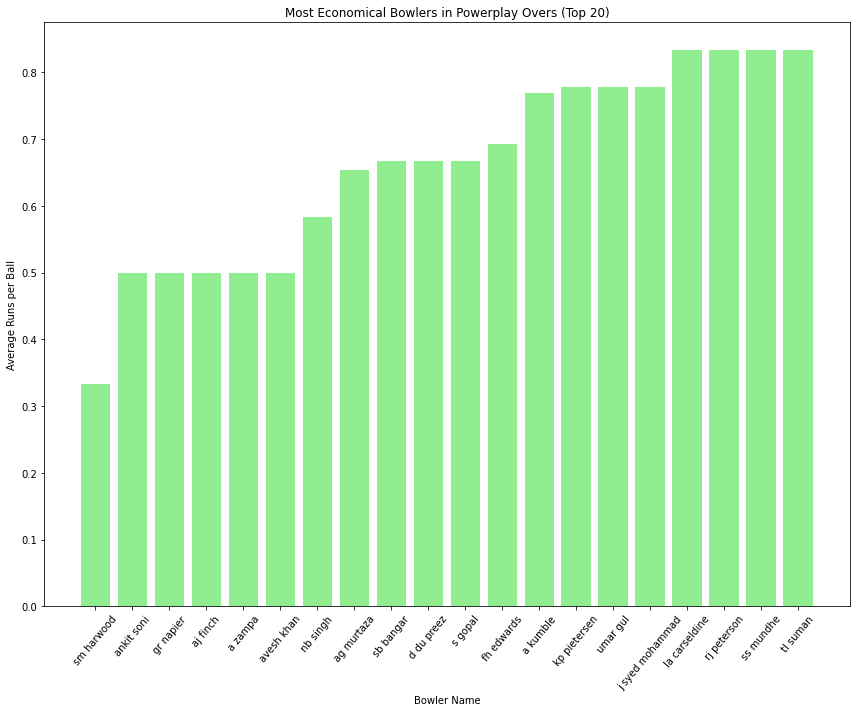

In [0]:
# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 10))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(20, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='lightgreen')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 20)')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()




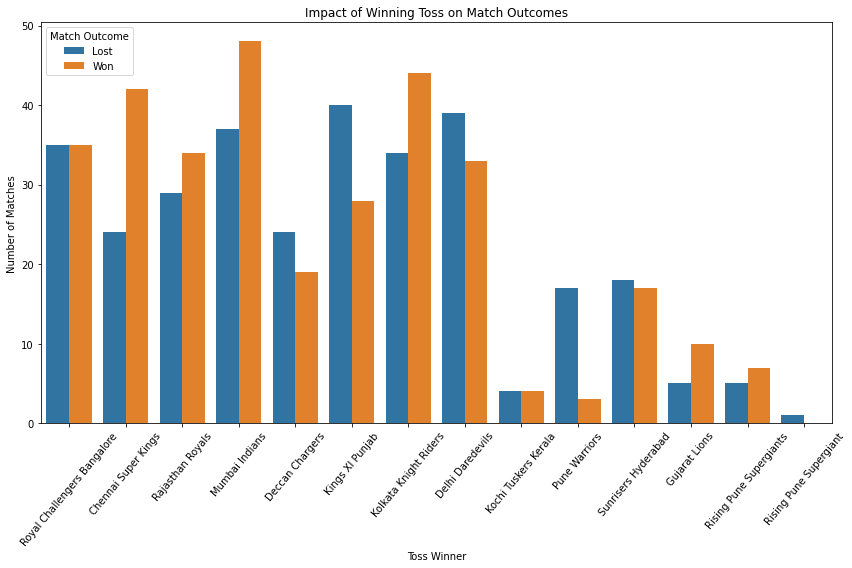

In [0]:
import seaborn as sns

toss_impact_pd = toss_impact_individual_matches.toPandas()


# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(12, 8))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


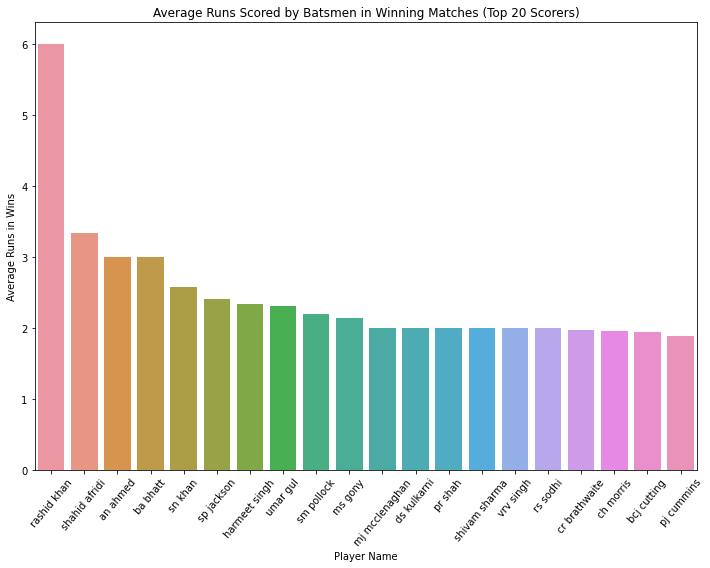

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()
# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(10, 8))
top_scorers = average_runs_pd.nlargest(20, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 20 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


In [0]:
scores_by_venue = spark.sql("""
    select venue_name, avg(total_runs) as avg_score, max(total_runs) as highest_score
    from ( 
        select b.match_id, m.venue_name, sum(runs_scored) as total_runs
        from ball_by_ball b join
        match m on b.match_id = m.match_id
        group by b.match_id, m.venue_name
    )
    group by venue_name order by avg_score desc
""")
scores_by_venue.show(10)

+--------------------+------------------+-------------+
|          venue_name|         avg_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 325.8181818181818|          399|
|Saurashtra Cricke...|             319.1|          393|
|Punjab Cricket As...|317.42857142857144|          341|
|    Barabati Stadium|311.57142857142856|          404|
|          Green Park|             308.0|          378|
|Maharashtra Crick...|302.06666666666666|          377|
|Rajiv Gandhi Inte...|             302.0|          365|
|Himachal Pradesh ...| 301.1111111111111|          371|
|MA Chidambaram St...| 299.7291666666667|          447|
|Sardar Patel Stad...|             298.0|          377|
+--------------------+------------------+-------------+
only showing top 10 rows



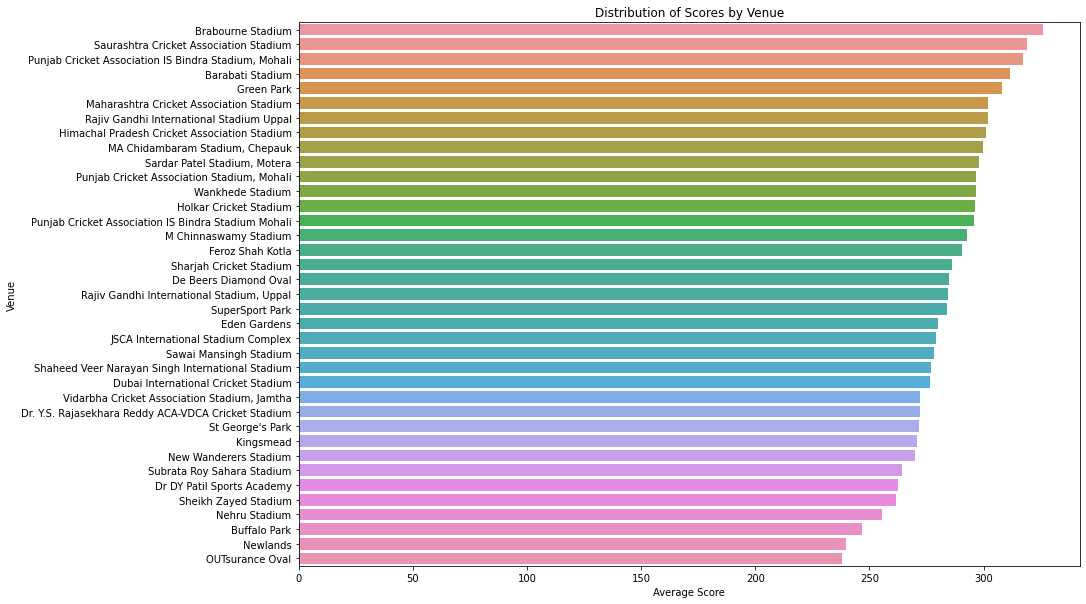

In [0]:
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 10))
sns.barplot(x='avg_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
dismissal_types = spark.sql("""
select out_type, count(*) as frequency from ball_by_ball
where out_type is not null 
group by out_type
order by frequency desc                            
""")

dismissal_types.show(10)

+-----------------+---------+
|         out_type|frequency|
+-----------------+---------+
|   Not Applicable|   137852|
|           caught|     3678|
|           bowled|     1382|
|          run out|      744|
|     Keeper Catch|      695|
|              lbw|      455|
|          stumped|      222|
|caught and bowled|      211|
|       hit wicket|        9|
|     retired hurt|        9|
+-----------------+---------+
only showing top 10 rows



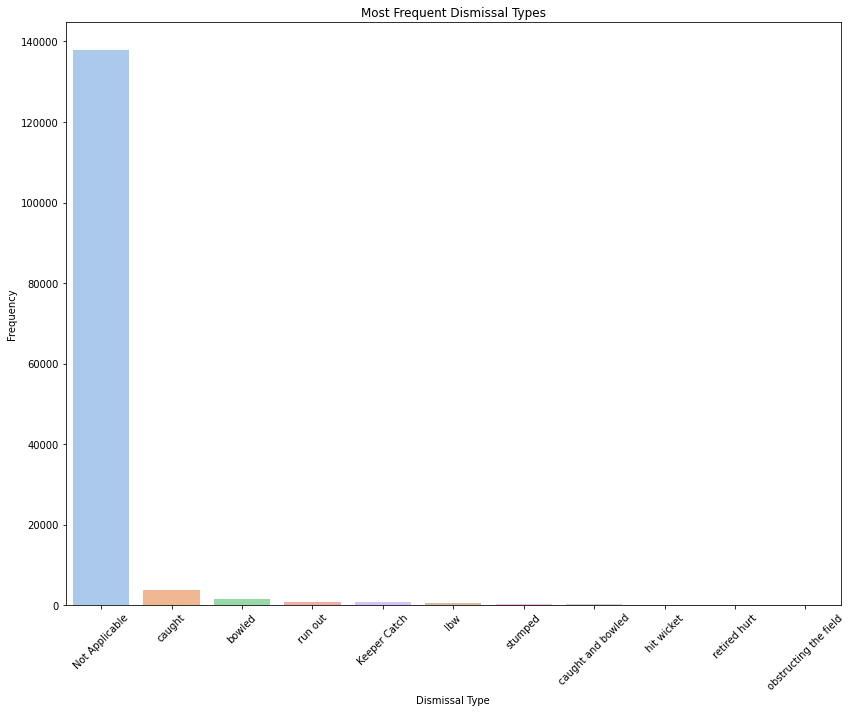

In [0]:
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='out_type', y='frequency', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
team_toss_win_performance = spark.sql("""
select team1, count(*) as matches_played,
sum(case when toss_winner == match_winner then 1 else 0 end) as wins_after_toss
from match
where toss_winner = team1 
group by team1 
order by wins_after_toss desc

""")

team_toss_win_performance.show(10)

+--------------------+--------------+---------------+
|               team1|matches_played|wins_after_toss|
+--------------------+--------------+---------------+
| Chennai Super Kings|            37|             27|
|      Mumbai Indians|            42|             26|
|Kolkata Knight Ri...|            36|             24|
|Royal Challengers...|            34|             19|
|    Delhi Daredevils|            36|             17|
|    Rajasthan Royals|            25|             16|
|     Kings XI Punjab|            32|             14|
| Sunrisers Hyderabad|            16|              8|
|     Deccan Chargers|            22|              6|
|Rising Pune Super...|             6|              4|
+--------------------+--------------+---------------+
only showing top 10 rows



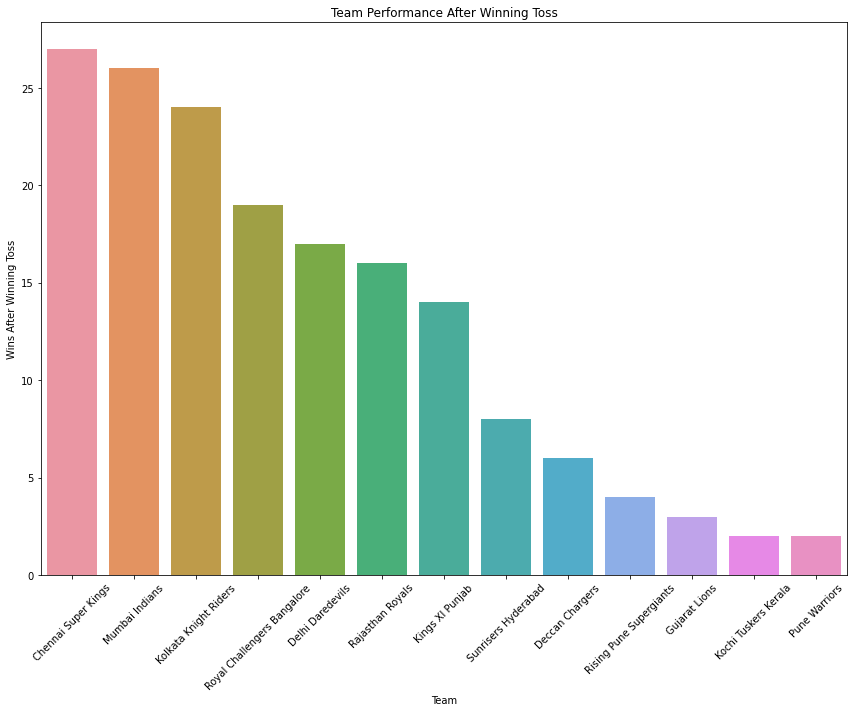

In [0]:
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='team1', y='wins_after_toss', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Team')
plt.ylabel('Wins After Winning Toss')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()